In [1]:
from xmitgcm import open_mdsdataset
import xarray as xr
import numpy as np
import xgcm
import datetime
import os
from matplotlib import pyplot as plt 
from scipy import interpolate
import warnings; warnings.simplefilter('ignore')

from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:35027 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 9 Cores: 72 Memory: 134.72 GB


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = False

#run = 'doppi'


plot_dir = '/glade/u/home/myoungs/Figures/'+datetime.date.today().isoformat()+'/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)


    
#for x in run:
    ## read in data #######
    
   


# Read in all the data

In [3]:
ds05 = open_mdsdataset('/glade/work/myoungs/newcarbon/dop_05',prefix=['DIAG','DIAGSurf','DIAGTracer'],delta_t=600)
ds1 = open_mdsdataset('/glade/work/myoungs/newcarbon/dop_1',prefix=['DIAG','DIAGSurf','DIAGTracer'],delta_t=600)
ds15 = open_mdsdataset('/glade/work/myoungs/newcarbon/doppi',prefix=['DIAG','DIAGSurf','DIAGTracer'],delta_t=600)
ds2 = open_mdsdataset('/glade/work/myoungs/newcarbon/dop_2',prefix=['DIAG','DIAGSurf','DIAGTracer'],delta_t=600)
ds25 = open_mdsdataset('/glade/work/myoungs/newcarbon/dop_25',prefix=['DIAG','DIAGSurf','DIAGTracer'],delta_t=600)
                        # ignore_unknown_vars==True)#,iters='377225') # ,'DIAGTracer'




## Concatenate into a single dataset with a wind variable

In [4]:
winds = [0.05, 0.1, 0.15, 0.2, 0.25]
ds = xr.concat([ds05, ds1, ds15, ds2, ds25],'wind')
grid = xgcm.Grid(ds, periodic=['X'])

ds

<xarray.Dataset>
Dimensions:              (XC: 400, XG: 400, YC: 204, YG: 204, Z: 32, Zl: 32, Zp1: 33, Zu: 32, layer_1TH_bounds: 50, layer_1TH_center: 49, layer_1TH_interface: 48, time: 39, wind: 5)
Coordinates:
    rAw                  (YC, XG) >f4 100000000.0 100000000.0 ... 100000000.0
    dxG                  (YG, XC) >f4 10000.0 10000.0 ... 10000.0 10000.0
    maskW                (Z, YC, XG) bool False False False ... False False
    dyG                  (YC, XG) >f4 10000.0 10000.0 ... 10000.0 10000.0
    rAz                  (YG, XG) >f4 100000000.0 100000000.0 ... 100000000.0
    hFacW                (Z, YC, XG) >f4 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PHrefF               (Zp1) >f4 dask.array<chunksize=(33,), meta=np.ndarray>
    rA                   (YC, XC) >f4 100000000.0 100000000.0 ... 100000000.0
    maskC                (Z, YC, XC) bool False False False ... False False
    PHrefC               (Z) >f4 dask.array<chunksize=(32,), meta=np.ndarray>
    dyC                  (YG, XC) >f4 10000.0 10000.0 ... 10000.0 10000.0
    Depth                (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    drC                  (Zp1) >f4 dask.array<chunksize=(33,), meta=np.ndarray>
    hFacS                (Z, YG, XC) >f4 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dxC                  (YC, XG) >f4 10000.0 10000.0 ... 10000.0 10000.0
    rAs                  (YG, XC) >f4 100000000.0 100000000.0 ... 100000000.0
    drF                  (Z) >f4 dask.array<chunksize=(32,), meta=np.ndarray>
    maskS                (Z, YG, XC) bool False False False ... False False
    hFacC                (Z, YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * layer_1TH_bounds     (layer_1TH_bounds) >f4 0.0 0.1632653 ... 7.836735 8.0
  * XC                   (XC) >f4 5000.0 15000.0 25000.0 ... 3985000.0 3995000.0
  * Zu                   (Zu) >f4 -10.0 -20.0 -30.0 ... -3440.0 -3720.0 -4000.0
  * layer_1TH_center     (layer_1TH_center) float32 0.08163265 ... 7.9183674
  * time                 (time) int64 36897120000 37054800000 ... 42888960000
  * Z                    (Z) >f4 -5.0 -15.0 -25.0 ... -3300.0 -3580.0 -3860.0
  * XG                   (XG) >f4 0.0 10000.0 20000.0 ... 3980000.0 3990000.0
  * Zp1                  (Zp1) >f4 0.0 -10.0 -20.0 ... -3440.0 -3720.0 -4000.0
  * layer_1TH_interface  (layer_1TH_interface) >f4 0.1632653 ... 7.836735
  * YG                   (YG) >f4 0.0 10000.0 20000.0 ... 2020000.0 2030000.0
  * Zl                   (Zl) >f4 0.0 -10.0 -20.0 ... -3160.0 -3440.0 -3720.0
  * YC                   (YC) >f4 5000.0 15000.0 25000.0 ... 2025000.0 2035000.0
    iter                 (wind, time) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
Dimensions without coordinates: wind
Data variables:
    TRELAX               (wind, time, YC, XC) float32 dask.array<chunksize=(1, 1, 204, 400), meta=np.ndarray>
    oceTAUX              (wind, time, YC, XG) float32 dask.array<chunksize=(1, 1, 204, 400), meta=np.ndarray>
    DICTFLX              (wind, time, YC, XC) float32 dask.array<chunksize=(1, 1, 204, 400), meta=np.ndarray>
    DICCFLX              (wind, time, YC, XC) float32 dask.array<chunksize=(1, 1, 204, 400), meta=np.ndarray>
    TRAC01               (wind, time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 32, 204, 400), meta=np.ndarray>
    VTRAC01              (wind, time, Z, YG, XC) float32 dask.array<chunksize=(1, 1, 32, 204, 400), meta=np.ndarray>
    WTRAC01              (wind, time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 32, 204, 400), meta=np.ndarray>
    TRAC02               (wind, time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 32, 204, 400), meta=np.ndarray>
    VTRAC02              (wind, time, Z, YG, XC) float32 dask.array<chunksize=(1, 1, 32, 204, 400), meta=np.ndarray>
    WTRAC02              (wind, time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 32, 204, 400), meta=np.ndarray>
    TRAC03               (wind, time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 32

## Plot wind stress versus total carbon fluxes

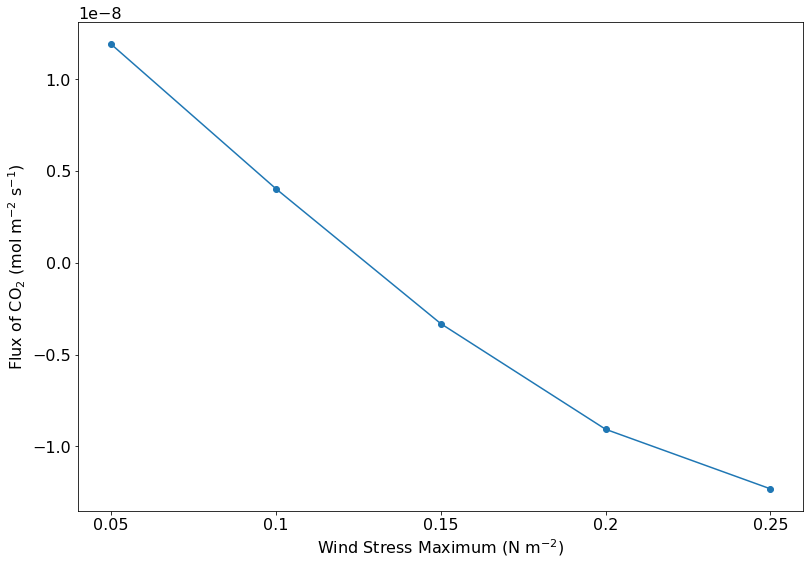

In [5]:
plt.figure()
ds.DICCFLX.mean(dim=['time','XC','YC']).plot.line('-o')
plt.xticks([0, 1, 2, 3, 4],[0.05, 0.1, 0.15, 0.2, 0.25])
plt.xlabel('Wind Stress Maximum (N m$^{-2}$)')
plt.ylabel('Flux of CO$_2$ (mol m$^{-2}$ s$^{-1}$)')

plt.savefig(plot_dir+'CO2Flux'+'.eps')

## Calculate the various linearization terms

In [6]:
### do analysis like Nikki suggested, analyzing the two different boxes near the ridge and far away from the ridge ###

### identify ridge box  500 km to 1500 km in y, 400 to 800 km in x
#plt.figure()
#(ds.DICCFLX[-1,53:-52,40:120]*-3.15e7).plot() 

### identify downstream box
#plt.figure()
#(ds.DICCFLX[-1,53:-52,300:380]).plot() 

### look at dic flux in box
DF = (ds.DICCFLX[0].mean(dim='time')*-3.15e7)-(ds.DICCFLX[2].mean(dim='time')*-3.15e7)


### calculate difference in DIC
DDIC = (ds.TRAC01[0,:,0].mean(dim='time')-ds.TRAC01[2,:,0].mean(dim='time'))*1e3


### calculate difference in Alkalinity
DAlk = (ds.TRAC02[0,:,0].mean(dim='time')-ds.TRAC02[2,:,0].mean(dim='time'))*1e3



### calculate difference in Temperature
DT = (ds.THETA[0,:,0]).mean(dim='time')-(ds.THETA[2,:,0]).mean(dim=['time'])


### calculate mean temperature
MT = (ds.THETA[2,:,0]).mean(dim=['YC','XC','time'])


### calculate the mean DIC
MDIC = (ds.TRAC01[2,:,0]).mean(dim=['YC','XC','time'])*1e3


### calculate the mean alkalinity
MAlk = (ds.TRAC02[2,:,0]).mean(dim=['YC','XC','time'])*1e3


### calculate gammadic, gammaalk
gammaDIC = (3*MAlk*MDIC - 2*MDIC*MDIC)/(2*MDIC-MAlk)/(MAlk-MDIC)
gammaAlk = -(MAlk*MAlk)/(2*MDIC-MAlk)/(MAlk-MDIC)


## Calculate pco2 pointwise using apply_ufunc

In [8]:
### need biogeochemistry to calculate ocePCO2

MpCO2 = xr.apply_ufunc(co3eq,MT, 35, 10, MAlk, MDIC,dask='allowed', vectorize = True)

### calculate delta pc02 ocean
MpCO21 = xr.apply_ufunc(co3eq, ds.THETA[0,:,0].mean(dim='time'), 35, 10,ds.TRAC02[0,:,0].mean(dim='time')*1e3 ,ds.TRAC02[0,:,0].mean(dim='time')*1e3,dask='allowed', vectorize = True)
MpCO22 = xr.apply_ufunc(co3eq, ds.THETA[2,:,0].mean(dim='time'), 35, 10,ds.TRAC02[2,:,0].mean(dim='time')*1e3 ,ds.TRAC02[2,:,0].mean(dim='time')*1e3,dask='allowed', vectorize = True)

### calculate the terms
DICterm = gammaDIC*MpCO2/MDIC*DDIC
Alkterm = gammaAlk*MpCO2/MAlk*DAlk
Tterm = MpCO2*0.0423*DT
## display terms


## Plot the results

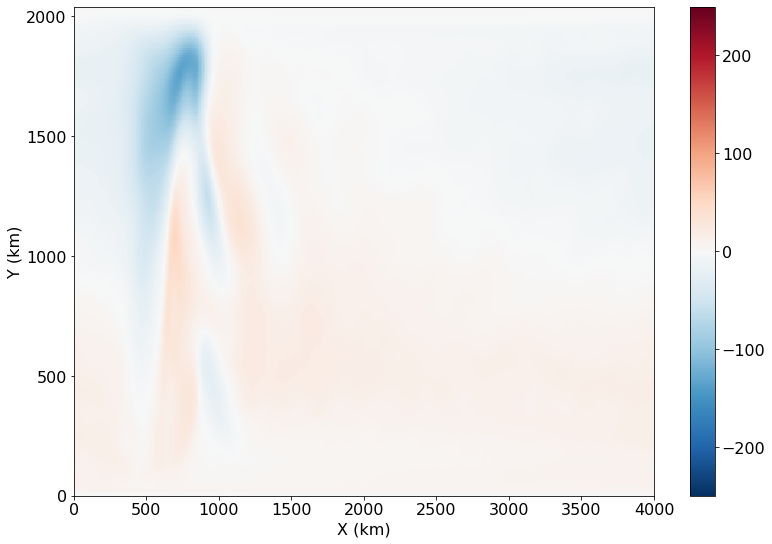

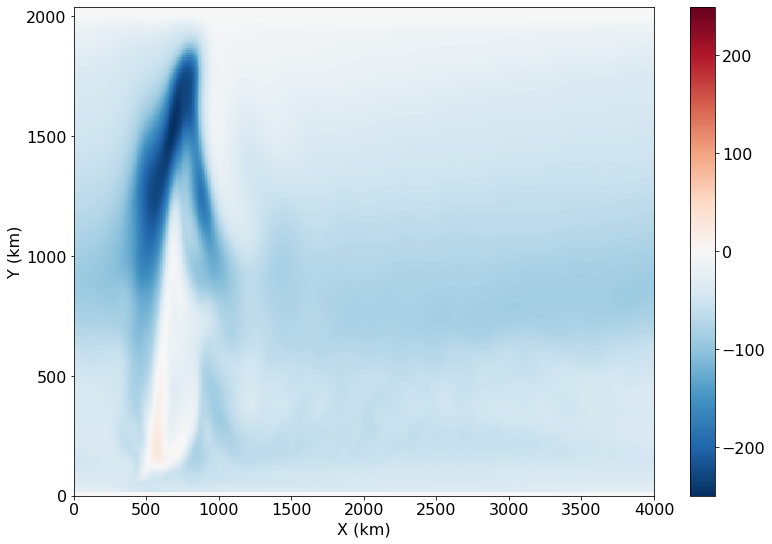

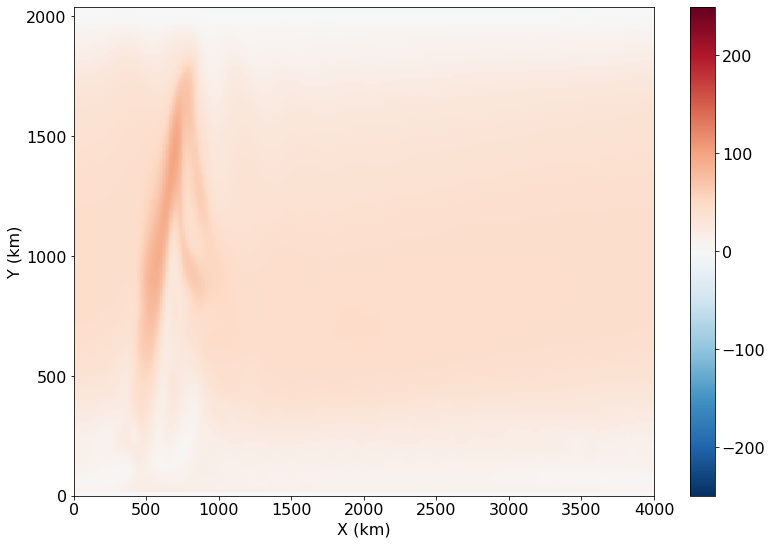

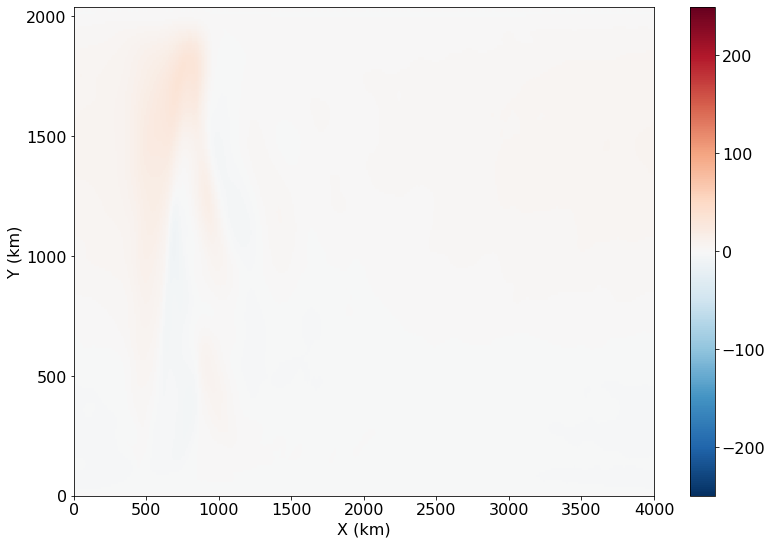

In [11]:
# plot change in pco2 fluxes, add streamlines
plt.figure()
(MpCO22-MpCO21).plot.pcolormesh(vmin = -250, vmax = 250,cmap=plt.cm.RdBu_r)
#((ds.UVEL[0,:,:-3].mean(dim='time')*ds.dyG*ds.drF[:-3]/1e6).sum(dim='Z').cumsum(dim='YC')).plot.contour(levels = 20,colors = 'black',linewidth=1)
#((ds.UVEL[2,:,:-3].mean(dim='time')*ds.dyG*ds.drF[:-3]/1e6).sum(dim='Z').cumsum(dim='YC')).plot.contour(levels = 20,colors = 'black',linewidth=1)
plt.title('')
plt.yticks([0,500000,1000000,1500000,2000000],[0,500,1000,1500,2000])
plt.ylabel('Y (km)')
plt.xticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000],[0,500,1000,1500,2000,2500,3000,3500,4000])
plt.xlabel('X (km)')
plt.savefig(plot_dir+'DCO2Flux'+'.eps')

# plot DIC term, check the variable size
plt.figure()
DICterm.plot.pcolormesh(vmin = -250, vmax = 250,cmap=plt.cm.RdBu_r)
#((ds.UVEL[-1,:-3]*ds.dyG*ds.drF[:-3]/1e6).sum(dim='Z').cumsum(dim='YC')).plot.contour(levels = 20,colors = 'black',linewidth=1)
plt.title('')
plt.yticks([0,500000,1000000,1500000,2000000],[0,500,1000,1500,2000])
plt.ylabel('Y (km)')
plt.xticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000],[0,500,1000,1500,2000,2500,3000,3500,4000])
plt.xlabel('X (km)')
plt.savefig(plot_dir+'DDICTerm'+'.eps')

# plot Alk term
plt.figure()
Alkterm.plot.pcolormesh(vmin = -250, vmax = 250,cmap=plt.cm.RdBu_r)
plt.title('')
plt.yticks([0,500000,1000000,1500000,2000000],[0,500,1000,1500,2000])
plt.ylabel('Y (km)')
plt.xticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000],[0,500,1000,1500,2000,2500,3000,3500,4000])
plt.xlabel('X (km)')
plt.savefig(plot_dir+'DAlkTerm'+'.eps')

# plot Temp term
plt.figure()
Tterm.plot.pcolormesh(vmin = -250, vmax = 250,cmap=plt.cm.RdBu_r)
plt.title('')
plt.yticks([0,500000,1000000,1500000,2000000],[0,500,1000,1500,2000])
plt.ylabel('Y (km)')
plt.xticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000],[0,500,1000,1500,2000,2500,3000,3500,4000])
plt.xlabel('X (km)')
plt.savefig(plot_dir+'DTterm'+'.eps')

# Riley's code for pco2

In [7]:
def co3eq(temp, s, z, alk, dic):
    """
    Calculates pCO2, pH, H2CO3*, HCO3, and CO3 concentrations.

    NOTE: Currently you have to do this for a single point at a time. Due to
    dependence on `np.roots`, it isn't extremely easy to vectorize, although
    I imagine it is possible if one spent a little time on it.

    Contact: Riley.Brady@colorado.edu


    Parameters
    ----------
    temp : float
        Temperature at location (degC)
    s : float
        Salinity at location (ppt)
    z : float
        Depth at location (m)
    alk : float
        Alkalinity at location (umol/kg)
    dic : float
        DIC at location (umol/kg)


    Returns
    -------
    pCO2 (uatm), pH, CO2 (umol/kg), HCO3 (umol/kg), CO3 (umol/kg) as floats.


    Reference
    ---------
    Emerson and Hedges 2008: Chemical Oceanography and the Marine Carbon Cycle.
    (4A 1.2)


    Example
    -------
    pco2, pH, CO2, HCO3, CO3 = co3eq(15, 35, 10, 2300, 2100)
    """
    # Conversions
    t = temp + 273.15
    Pr = z/10
    alk = alk * 1e-6
    dic = dic * 1e-6
    R = 83.131

    # Calculate total borate from chlorinity
    tbor = .000416 * s / 35

    # Calculate Henry's Law coefficient, K0 (Weiss, 1974)
    U1 = -60.2409 + 93.4517 * (100/t) + 23.3585*np.log(t/100)
    U2 = s * (.023517 - .023656 * (t/100) + .0047036 * (t/100)**2)
    KH = np.exp(U1 + U2)

    # Calculate KB from temp and salinity (Dickson, 1990)
    KB = np.exp((-8966.9 - 2890.53 * s**0.5 - 77.942 * s + 1.728 * s**1.5
                 - 0.0996 * s**2)/t + 148.0248 + 137.1942 * s**0.5 + 1.62142 * s
                 - (24.4344 + 25.085 * s**0.5 + 0.2474 * s) * np.log(t)
                 + 0.053105 * s**0.5 * t);

    # Calculate K1 and K2 (Luecker et al., 2000)
    K1 = 10**(-(3633.86/t - 61.2172 + 9.67770 * np.log(t) - 0.011555 * s
                + 0.0001152 * s**2))
    K2 = 10**(-(471.78/t + 25.92990 - 3.16967 * np.log(t) - 0.01781 * s
                + 0.0001122 * s**2))

    # Pressure variation of K1, K2, and KB (Millero, 1995)
    dvB = -29.48 + 0.1622 * temp - .002608 * (temp)**2
    dv1 = -25.50 + 0.1271 * temp
    dv2 = -15.82 - 0.0219 * temp
    dkB = -.00284
    dk1 = -.00308 + 0.0000877 * temp
    dk2 = .00113 - .0001475 * temp
    KB  = (np.exp(-(dvB / (R * t)) * Pr + (0.5 * dkB / (R * t)) * Pr**2)) * KB
    K1  = (np.exp(-(dv1 / (R * t)) * Pr + (0.5 * dk1 / (R * t)) * Pr**2)) * K1
    K2  = (np.exp(-(dv2 / (R * t)) * Pr + (0.5 * dk2 / (R * t)) * Pr**2)) * K2

    # Temperature dependence of KW (DOE, 1994)
    KW1 = 148.96502 - 13847.26 / t - 23.65218 * np.log(t)
    KW2 = (118.67 / t - 5.977 + 1.0495 * np.log(t)) * s**.5 - 0.01615 * s
    KW  = np.exp(KW1 + KW2)

    # solve for H ion (Zeebe and Wolf-Gladrow, 2000)
    a1 = 1
    a2 = (alk + KB + K1)
    a3 = (alk * KB - KB * tbor - KW + alk * K1 + K1 * KB + K1 * K2 - dic * K1)
    a4 = (-KW  * KB + alk * KB * K1 - KB * tbor * K1 - KW * K1 + alk * K1 * K2
          + KB * K1 * K2 - dic * KB * K1 - 2 * dic * K1 * K2)
    a5 = (-KW * KB * K1 + alk * KB * K1 * K2 - KW * K1 * K2 - KB * tbor * K1
          * K2 - 2 * dic * KB * K1 * K2)
    a6 = -KB * KW * K1 * K2
    p = [a1, a2, a3, a4, a5, a6]
    r = np.roots(p)
    h = np.max(np.real(r))

    # Calculate bicarbonate, carbonate, and aqueous CO2 usin DIC, Alk, and H+
    hco3 = dic / (1 + h/K1 + K2/h) * 1e6
    co3 = dic / (1 + h/K2 + h * h / (K1 * K2)) * 1e6
    co2 = dic / (1 + K1/h + K1 * K2 / (h * h)) * 1e6
    pco2 = co2 / KH
    pH = -np.log10(h)

    # Calculate B(OH)4 and OH
    BOH4 = KB * tbor / (h + KB)
    OH = KW / h

    # recalculate DIC and Alk to check calculations
    Ct = (hco3 + co3 + co2) * 1e6
    At = (hco3 + 2*co3 + BOH4 + OH - h) * 1e6

    #return pco2, pH, co2, hco3, co3
    return pco2